In [11]:
import os
import sys 
import glob
import dask
import numpy as np
from matplotlib import pyplot as plt
import xarray as xr

import cmcrameri.cm as cmc
import drama.utils as drtls
from drama.performance.sar.antenna_patterns import sinc_bp, phased_array

from dataclasses import dataclass
from typing import Callable, Union, List, Dict, Any
from leakage.velocity_leakage import S1DopplerLeakage, add_dca_to_leakage_class
from leakage.misc import round_to_hour, angular_difference, calculate_distance

In [12]:
data_dir = "/Users/opodriscoll/Documents/Data/Sentinel1/IW/"
data_dir_dca = "/Users/opodriscoll/Documents/Data/Sentinel1/DCA/"

# scenarios = [
#     'Aghulas_20200309',
#     'Aghulas_20200321',
#     'Aghulas_20200402',
#     'Aghulas_20200414',
#     'Aghulas_20200426'
#     ]

scenarios = [
    # 'Aghulas_20200203',
    'Aghulas_20200215',
    'Aghulas_20200227',
    'Aghulas_20200310',
    'Aghulas_20200322',
    'Aghulas_20200403',
    'Aghulas_20200415',
    'Aghulas_20200427',
]

# scenarios = [scenarios[-1]]

In [13]:
# noises = []
# signals = []
results = []
for i, scenario in enumerate(scenarios):
    files = glob.glob(f"{data_dir+scenario}/*.SAFE")

    test = S1DopplerLeakage(
        filename=files,
        f0 = 5_400_000_000,
        z0 = 823_000,
        era5_directory='../../data/leakage/era5_winds/',
        resolution_product=25_000,
        az_footprint_cutoff=80_000,
        vx_sat=6_800,
        PRF=4,
        grid_spacing=150,
        antenna_length=2.87,
        antenna_height=0.32,
        beam_pattern= 'phased_array', #'phased_array', sinc
        antenna_elements=4,
        antenna_weighting=0.75,
        swath_start_incidence_angle_scat=35,
        boresight_elevation_angle_scat=40,
        random_state = 42 + i, # NOTE random state changes per scene
        fill_nan_limit = 1,

        # era5_smoothing_window=30,
        # denoise = True,
        # _pulsepair_noise = True
        _speckle_noise= False
        )
    test.apply()

    data_dir_dca = "/Users/opodriscoll/Documents/Data/Sentinel1/DCA/"
    files_dca = glob.glob(f"{data_dir_dca+scenario}/*.nc")
    
    add_dca_to_leakage_class(test, files_dca=files_dca)
    
    results.append(test)

/Users/opodriscoll/Documents/Scripts/DopSCA/src/leakage/velocity_leakage.py:306: UserWarning: Combination of vx_sat, PRF and grid_spacing may lead to aliasing: (vx_sat / PRF) % grid_spacing != 0
  warnings.warn("Combination of vx_sat, PRF and grid_spacing may lead to aliasing: (vx_sat / PRF) % grid_spacing != 0")


Associated file found and reloaded: /Users/opodriscoll/Documents/Data/Sentinel1/IW/Aghulas_20200215/7D80_9061_A3F0_F5E9_res150.nc
Loading nearest ERA5 point w.r.t. observation from ERA5 file: ../../data/leakage/era5_winds/era5_20200215h1700_lat-31_3_lon31_1.nc


/Users/opodriscoll/Documents/Scripts/DopSCA/src/leakage/velocity_leakage.py:306: UserWarning: Combination of vx_sat, PRF and grid_spacing may lead to aliasing: (vx_sat / PRF) % grid_spacing != 0
  warnings.warn("Combination of vx_sat, PRF and grid_spacing may lead to aliasing: (vx_sat / PRF) % grid_spacing != 0")


Associated file found and reloaded: /Users/opodriscoll/Documents/Data/Sentinel1/IW/Aghulas_20200227/AB12_C338_CC42_FD2F_res150.nc
Loading nearest ERA5 point w.r.t. observation from ERA5 file: ../../data/leakage/era5_winds/era5_20200227h1700_lat-31_3_lon31_1.nc


/Users/opodriscoll/Documents/Scripts/DopSCA/src/leakage/velocity_leakage.py:306: UserWarning: Combination of vx_sat, PRF and grid_spacing may lead to aliasing: (vx_sat / PRF) % grid_spacing != 0
  warnings.warn("Combination of vx_sat, PRF and grid_spacing may lead to aliasing: (vx_sat / PRF) % grid_spacing != 0")


Associated file found and reloaded: /Users/opodriscoll/Documents/Data/Sentinel1/IW/Aghulas_20200310/432C_5968_914A_E7BA_res150.nc
Loading nearest ERA5 point w.r.t. observation from ERA5 file: ../../data/leakage/era5_winds/era5_20200310h1700_lat-31_3_lon31_1.nc


/Users/opodriscoll/Documents/Scripts/DopSCA/src/leakage/velocity_leakage.py:306: UserWarning: Combination of vx_sat, PRF and grid_spacing may lead to aliasing: (vx_sat / PRF) % grid_spacing != 0
  warnings.warn("Combination of vx_sat, PRF and grid_spacing may lead to aliasing: (vx_sat / PRF) % grid_spacing != 0")


Associated file found and reloaded: /Users/opodriscoll/Documents/Data/Sentinel1/IW/Aghulas_20200322/53A3_CF10_DAC5_E02D_res150.nc
Loading nearest ERA5 point w.r.t. observation from ERA5 file: ../../data/leakage/era5_winds/era5_20200322h1700_lat-31_3_lon31_1.nc


/Users/opodriscoll/Documents/Scripts/DopSCA/src/leakage/velocity_leakage.py:306: UserWarning: Combination of vx_sat, PRF and grid_spacing may lead to aliasing: (vx_sat / PRF) % grid_spacing != 0
  warnings.warn("Combination of vx_sat, PRF and grid_spacing may lead to aliasing: (vx_sat / PRF) % grid_spacing != 0")


Associated file found and reloaded: /Users/opodriscoll/Documents/Data/Sentinel1/IW/Aghulas_20200403/09A3_9D36_A648_D652_res150.nc
Loading nearest ERA5 point w.r.t. observation from ERA5 file: ../../data/leakage/era5_winds/era5_20200403h1700_lat-31_3_lon31_1.nc


/Users/opodriscoll/Documents/Scripts/DopSCA/src/leakage/velocity_leakage.py:306: UserWarning: Combination of vx_sat, PRF and grid_spacing may lead to aliasing: (vx_sat / PRF) % grid_spacing != 0
  warnings.warn("Combination of vx_sat, PRF and grid_spacing may lead to aliasing: (vx_sat / PRF) % grid_spacing != 0")


Associated file found and reloaded: /Users/opodriscoll/Documents/Data/Sentinel1/IW/Aghulas_20200415/1AAE_53C5_7B19_DDF6_res150.nc
Loading nearest ERA5 point w.r.t. observation from ERA5 file: ../../data/leakage/era5_winds/era5_20200415h1700_lat-31_3_lon31_1.nc


/Users/opodriscoll/Documents/Scripts/DopSCA/src/leakage/velocity_leakage.py:306: UserWarning: Combination of vx_sat, PRF and grid_spacing may lead to aliasing: (vx_sat / PRF) % grid_spacing != 0
  warnings.warn("Combination of vx_sat, PRF and grid_spacing may lead to aliasing: (vx_sat / PRF) % grid_spacing != 0")


Associated file found and reloaded: /Users/opodriscoll/Documents/Data/Sentinel1/IW/Aghulas_20200427/02F0_278B_ABCD_EC97_res150.nc
Loading nearest ERA5 point w.r.t. observation from ERA5 file: ../../data/leakage/era5_winds/era5_20200427h1700_lat-31_3_lon31_1.nc


In [28]:
func_rmse = lambda x, rounding=3:  np.round(np.sqrt(np.mean(x**2)).values*1, rounding)
func_rmse_xr = lambda x, rounding=3:  np.round(np.sqrt(np.mean(x**2)), rounding)

In [29]:
samples = results #results[:3] + [results[-1]] # results

residuals = [result.data.V_leakage_pulse_rg_subscene - result.data.V_leakage_pulse_rg_subscene_inverted for result in samples]
backscatters = [result.data.nrcs_scat for result in samples]
signals = [result.data.V_dca_pulse_rg_subscene for result in samples]
currents =  [result.data.V_dca_pulse_rg_subscene - result.data.V_wb_pulse_rg_subscene for result in samples]
noise = [result.data.V_sigma_subscene - result.data.V_leakage_pulse_rg_subscene_inverted for result in samples]

In [30]:
ds_residual = xr.concat(residuals, dim = 'time')#.sel(slow_time = slice(0, 350E3))#.T.plot(robust = True, cmap = cmc.vik)
ds_currents = xr.concat(currents, dim = 'time')#.T.plot(robust = True, cmap = cmc.vik)
ds_nrcs = xr.concat(backscatters, dim = 'time')#.sel(slow_time = slice(0, 350E3))
ds_noise = xr.concat(noise, dim = 'time')#.sel(slow_time = slice(0, 350E3))

clip_1 = ds_currents/ds_currents
clip_2 = ds_residual/ds_residual

ds_residual = ds_residual * clip_1
ds_currents = ds_currents * clip_2
ds_noise = ds_noise * clip_2 * clip_1

ds_residual_mean = ds_residual.mean(dim = 'time')
ds_residual_std = ds_residual.std(dim = 'time')
ds_noise_mean = ds_noise.mean(dim = 'time')
ds_currents_mean = ds_currents.mean(dim = 'time')

print('leakage:', func_rmse(ds_residual_mean), ds_residual.groupby('time',squeeze=False).map(func_rmse_xr).values, '\n')
print('noise:', func_rmse(ds_noise_mean), ds_noise.groupby('time',squeeze=False).map(func_rmse_xr).values, '\n')
print('signal:', func_rmse(ds_currents_mean), ds_currents.groupby('time',squeeze=False).map(func_rmse_xr).values, '\n')

leakage: 0.107 [0.255 0.431 0.257 0.192 0.192 0.256 0.24 ] 

noise: 0.938 [2.229 2.422 2.356 2.334 2.348 2.515 2.359] 

signal: 0.396 [0.54  0.433 0.455 0.438 0.482 0.542 0.608] 



In [31]:
(np.mean(ds_residual.groupby('time',squeeze=False).map(func_rmse_xr).values), np.mean(ds_noise.groupby('time',squeeze=False).map(func_rmse_xr).values), np.mean(ds_currents.groupby('time',squeeze=False).map(func_rmse_xr).values)) 

(0.26042858, 2.3661427, 0.49971431)

In [32]:
(np.mean(ds_residual.groupby('time',squeeze=False).map(func_rmse_xr).values), np.mean(ds_noise.groupby('time',squeeze=False).map(func_rmse_xr).values), np.mean(ds_currents.groupby('time',squeeze=False).map(func_rmse_xr).values))  / np.sqrt(len(samples)) 

array([0.09843275, 0.8943179 , 0.18887426], dtype=float32)

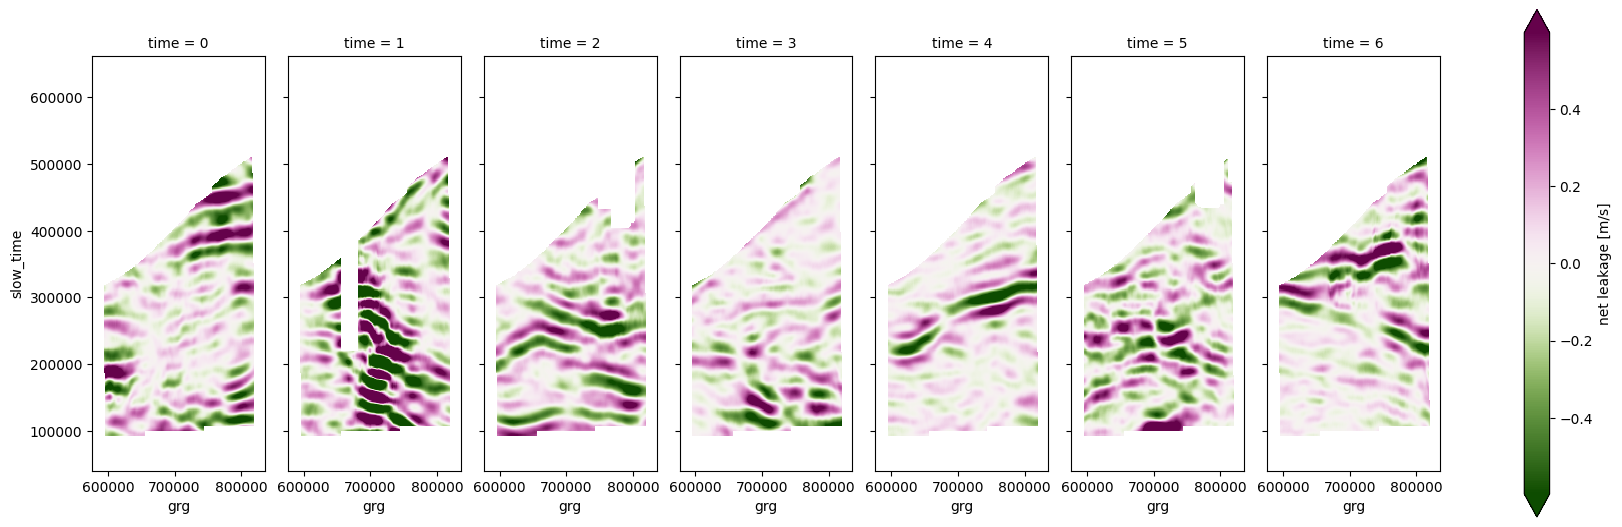

In [33]:
a = ds_residual.plot(x='grg', y = 'slow_time', col = 'time', robust = True, cmap = cmc.bam_r, figsize = (18,6), cbar_kwargs = {'label':'net leakage [m/s]'})
_ = [ax.axes.set_aspect('equal') for ax in a.axs.ravel()]

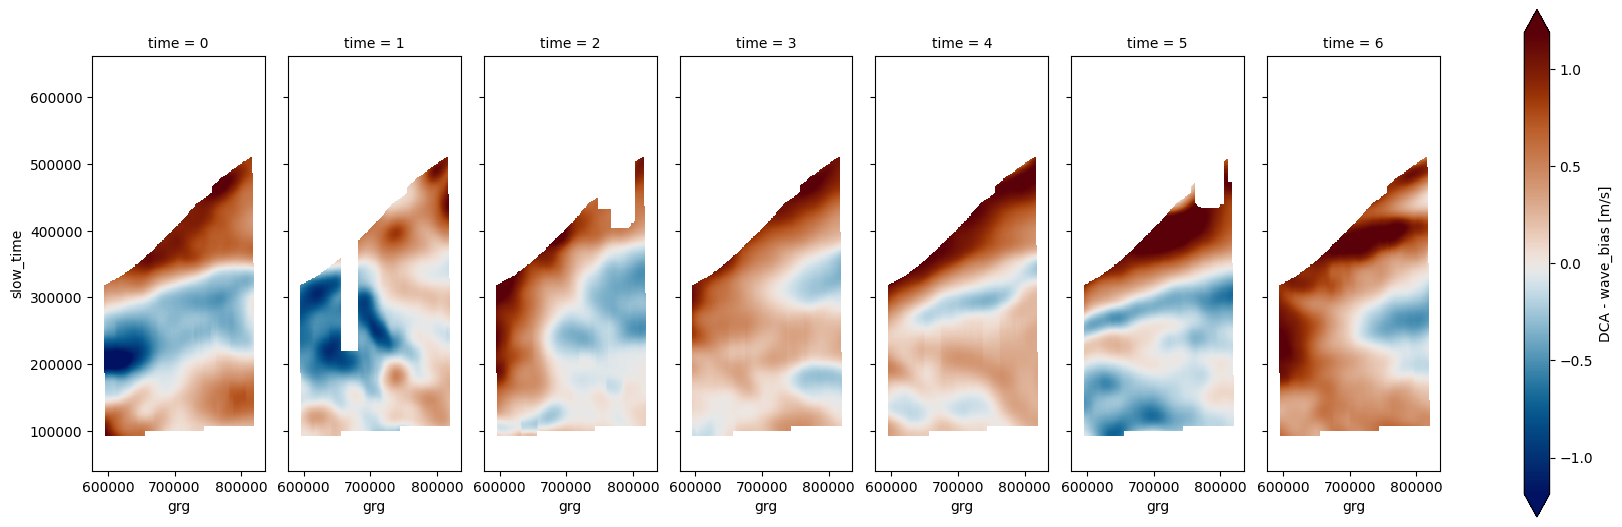

In [34]:
a = ds_currents.plot(x='grg', y = 'slow_time', col = 'time', robust = True, cmap = cmc.vik, figsize = (18,6), cbar_kwargs = {'label':'DCA - wave_bias [m/s]'})
_ = [ax.axes.set_aspect('equal') for ax in a.axs.ravel()]

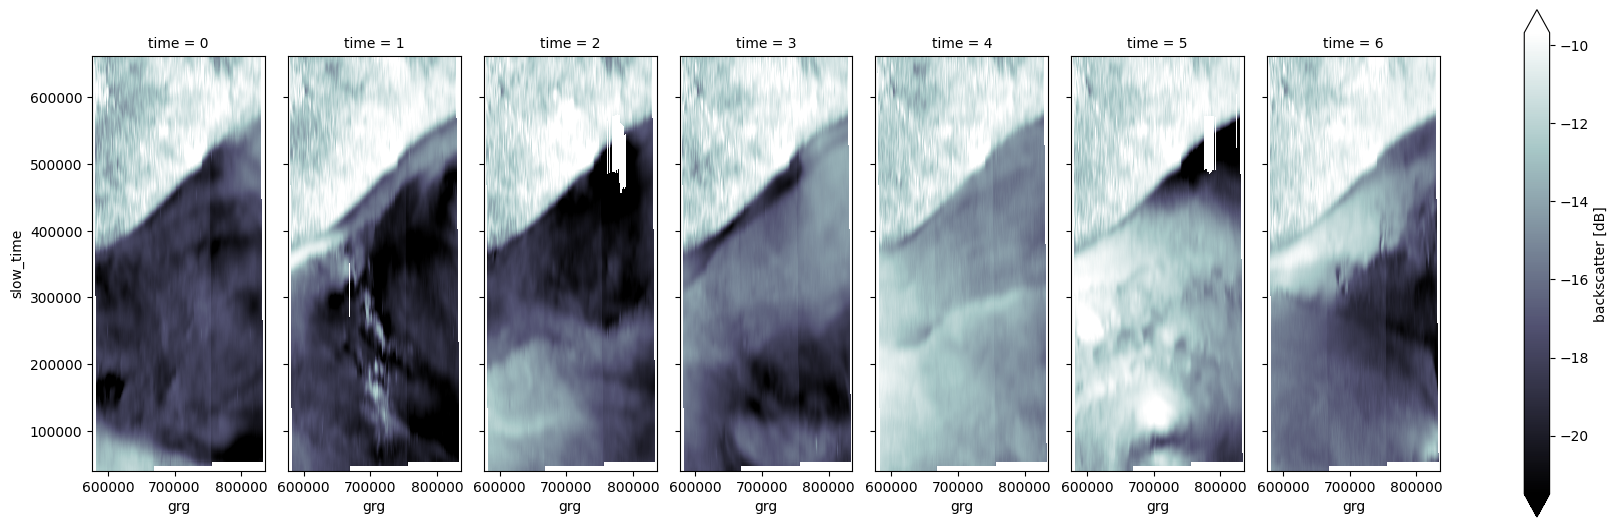

In [35]:
a = (10*np.log10(ds_nrcs)).plot(x='grg', y = 'slow_time', col = 'time', robust = True, cmap = 'bone', figsize = (18,6), cbar_kwargs = {'label':'backscatter [dB]'})
_ = [ax.axes.set_aspect('equal') for ax in a.axs.ravel()]

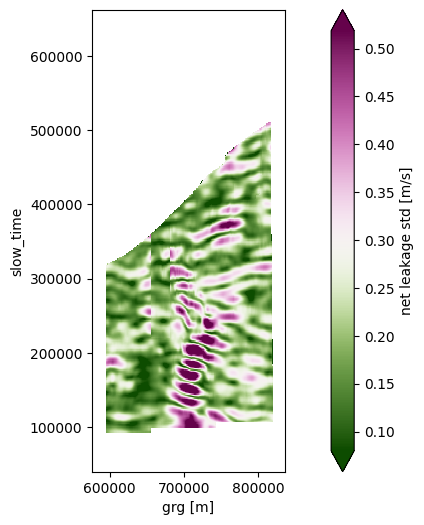

In [36]:
a = ds_residual_std.T.plot(robust = True, cmap = cmc.bam_r, figsize = (12,6), cbar_kwargs = {'label':'net leakage std [m/s]'})
a.axes.set_aspect('equal')

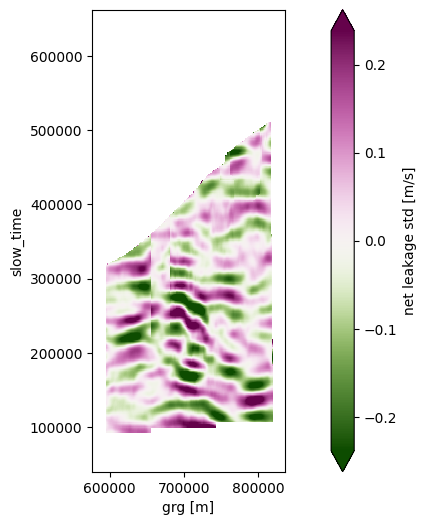

In [37]:
a = ds_residual_mean.T.plot(robust = True, cmap = cmc.bam_r, figsize = (12,6), cbar_kwargs = {'label':'net leakage std [m/s]'})
a.axes.set_aspect('equal')

In [38]:
def signal_2_noise_ratio(signal, noise):
    return signal**2 / noise**2

def to_decibel(x):
    return 10*np.log10(x)

def from_decibel(x):
    return 10**(x/10)

In [39]:
snr = to_decibel(signal_2_noise_ratio(signal=ds_currents, noise=ds_residual))

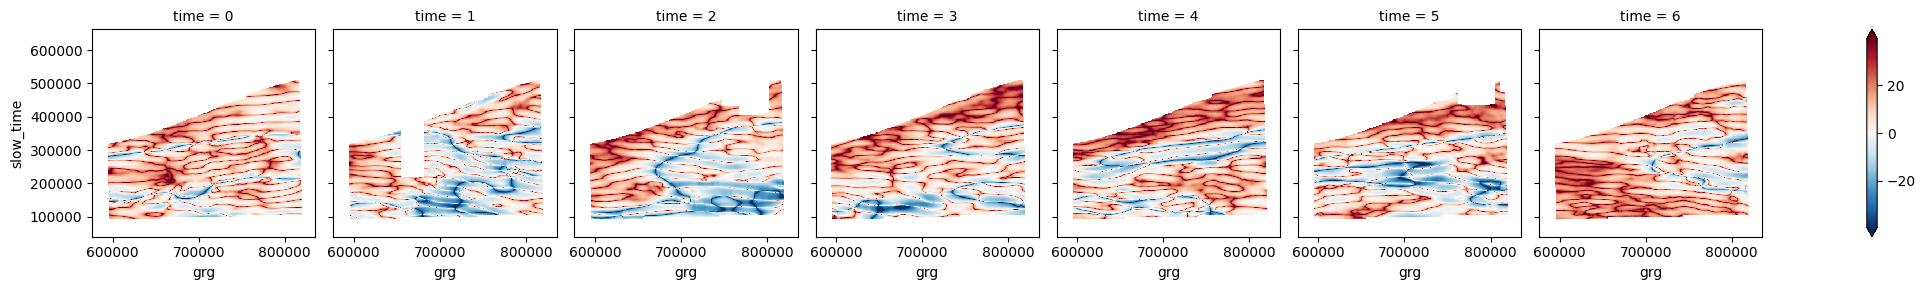

In [40]:
snr.plot(x = 'grg', y='slow_time', col = 'time', robust = True)

individual snr 9.26075 12.261873
individual snr 2.0985525 14.732025
individual snr 3.1973107 16.64273
individual snr 8.153187 16.080673
individual snr 9.01874 15.739958
individual snr 5.484531 15.979784
individual snr 12.61496 13.277894
average SNR 7.198374 15.4048195
SNR of averaged -11.30869 14.618583


Text(0, 0.5, 'Relative occurence')

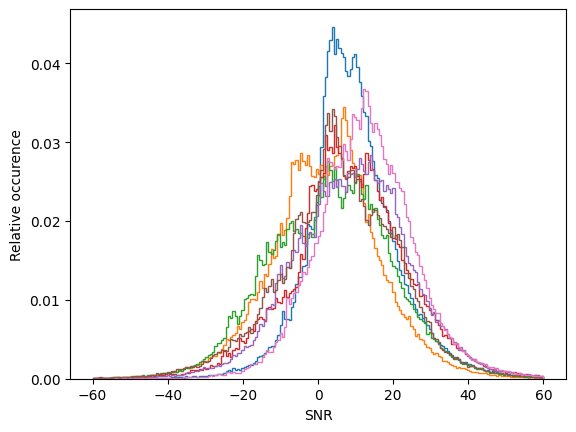

In [41]:
plt.figure()
for i in range(snr.sizes['time']):
    _ = snr.isel(time = i).plot.hist(bins = 200, range = (-60, 60), alpha = 1, density = True, histtype = 'step')
    print('individual snr', np.nanmean(snr.isel(time = i)), np.nanstd(snr.isel(time = i)))
# plt.title('Signal to noise distribution')
print('average SNR', np.nanmean(snr), np.nanstd(snr))

snr_of_mean = to_decibel(signal_2_noise_ratio(signal=ds_currents_mean, noise=ds_noise_mean))
print('SNR of averaged', np.nanmean(snr_of_mean), np.nanstd(snr_of_mean))
plt.xlabel('SNR')
plt.ylabel('Relative occurence')